<a href="https://colab.research.google.com/github/Abinash-bit/fault-analysis-randomforest/blob/master/Machine_Learning_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Random Forest algorithm**

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

**Random Forest algorithm intuition**

Random forest algorithm intuition can be divided into two stages.

In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:-

1. Randomly select k features from a total of m features where k < m.
2. Among the k features, calculate the node d using the best split point.
3. Split the node into daughter nodes using the best split.
4. Repeat 1 to 3 steps until l number of nodes has been reached.
5. Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.

In the second stage, we make predictions using the trained random forest algorithm.

1. We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2. Then, we calculate the votes for each predicted target.
3. Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


**Random Forest algorithm intuition**

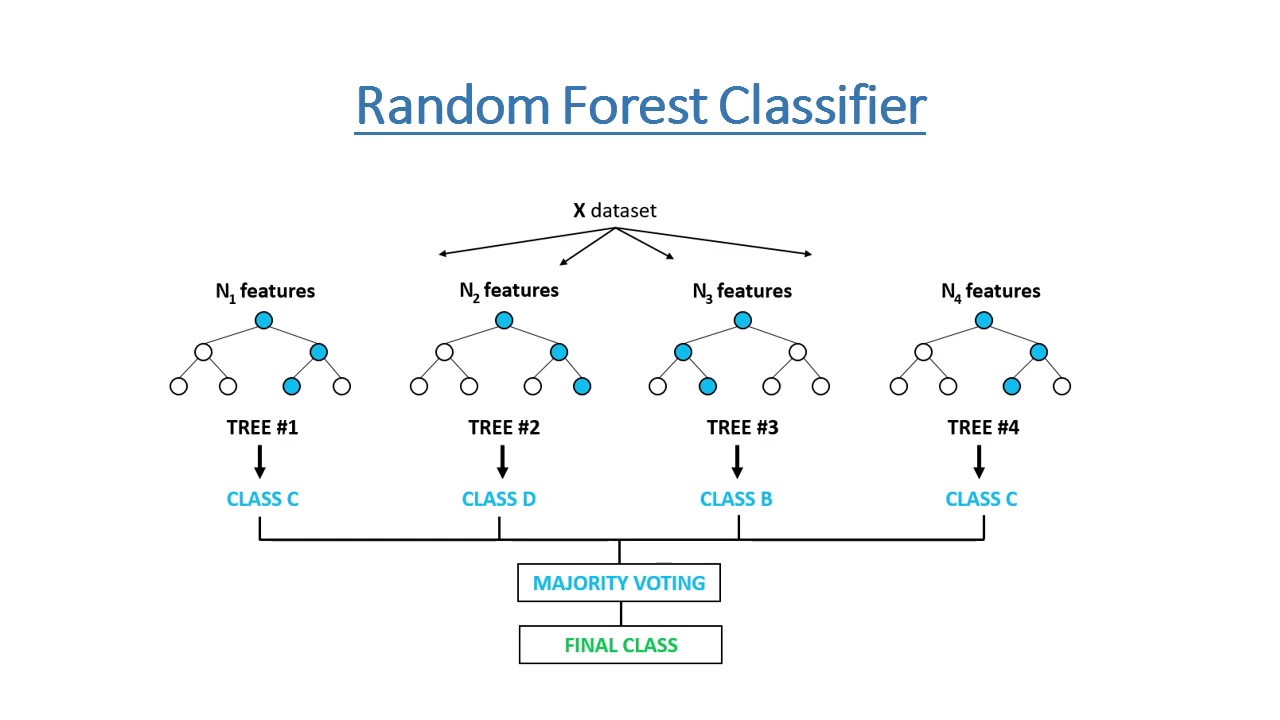

**Advantages and disadvantages of Random Forest algorithm**

The advantages of Random forest algorithm are as follows:-

1. Random forest algorithm can be used to solve both classification and regression problems.
2. It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
3. Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
4. Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-

1. The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.

2. The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.

**Feature selection with Random Forests**

Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest.

The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

**1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the Dataset**



In [2]:
dataset = pd.read_csv("/content/ABCG Modified.csv")

**Data Preprocessing**

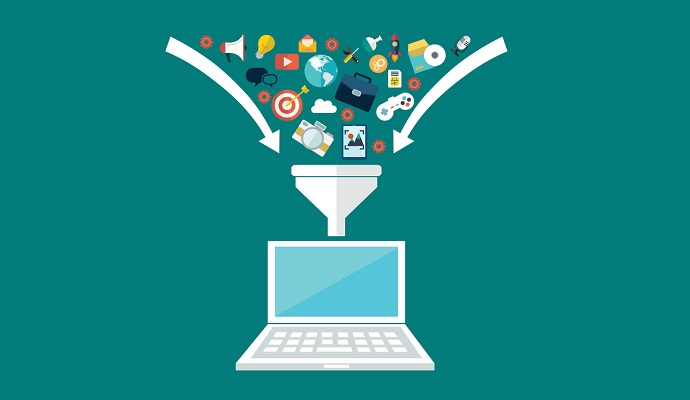

# Why Data Preprocessing in Machine Learning?

When it comes to creating a Machine Learning model, data preprocessing is the first step marking the initiation of the process. Typically, real-world data is incomplete, inconsistent, inaccurate (contains errors or outliers), and often lacks specific attribute values/trends. This is where data preprocessing enters the scenario – it helps to clean, format, and organize the raw data, thereby making it ready-to-go for Machine Learning models. Let’s explore various steps of data preprocessing in machine learning.

# 1- Acquire the dataset

Acquiring the dataset is the first step in data preprocessing in machine learning. To build and develop Machine Learning models, you must first acquire the relevant dataset. This dataset will be comprised of data gathered from multiple and disparate sources which are then combined in a proper format to form a dataset. Dataset formats differ according to use cases. For instance, a business dataset will be entirely different from a medical dataset. While a business dataset will contain relevant industry and business data, a medical dataset will include healthcare-related data.

# 2- Import all the crucial libraries

The predefined Python libraries can perform specific data preprocessing jobs. Importing all the crucial libraries is the second step in data preprocessing in machine learning.



```
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
```

# 3- Identifying and handling the missing values.
In data preprocessing, it is pivotal to identify and correctly handle the missing values, failing to do this, you might draw inaccurate and faulty conclusions and inferences from the data. Needless to say, this will hamper your ML project.

some typical reasons why data is missing:

A. User forgot to fill in a field.

B. Data was lost while transferring manually from a legacy database.

C. There was a programming error.

D. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

Basically, there are two ways to handle missing data:

Deleting a particular row – In this method, you remove a specific row that has a null value for a feature or a particular column where more than 75% of the values are missing. However, this method is not 100% efficient, and it is recommended that you use it only when the dataset has adequate samples. You must ensure that after deleting the data, there remains no addition of bias. Calculating the mean – This method is useful for features having numeric data like age, salary, year, etc. Here, you can calculate the mean, median, or mode of a particular feature or column or row that contains a missing value and replace the result for the missing value. This method can add variance to the dataset, and any loss of data can be efficiently negated. Hence, it yields better results compared to the first method (omission of rows/columns). Another way of approximation is through the deviation of neighbouring values. However, this works best for linear data.


In [3]:
dataset.head()

,Time,Absolute Ia,Absolute Ib,Absolute Ic,Fault
0,0.000000,0.014057,0.193897,0.160845,No
1,0.000167,0.020231,0.195189,0.157184,No
2,0.000333,0.026372,0.195777,0.152925,No
3,0.000500,0.032466,0.195657,0.148070,No
4,0.000667,0.038496,0.194823,0.142626,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6000 non-null   float64
 1   Absolute Ia  6000 non-null   float64
 2   Absolute Ib  6000 non-null   float64
 3   Absolute Ic  6000 non-null   float64
 4   Fault        6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,6000.0,0.499897,0.288688,0.000000,0.249948,0.499897,0.749845,0.999793
Absolute Ia,6000.0,0.163452,0.177223,0.000101,0.061933,0.105592,0.190464,1.154117
Absolute Ib,6000.0,0.177150,0.163034,0.000099,0.074447,0.127556,0.205689,0.889536
Absolute Ic,6000.0,0.201339,0.172846,0.000041,0.090922,0.161196,0.247110,1.057077


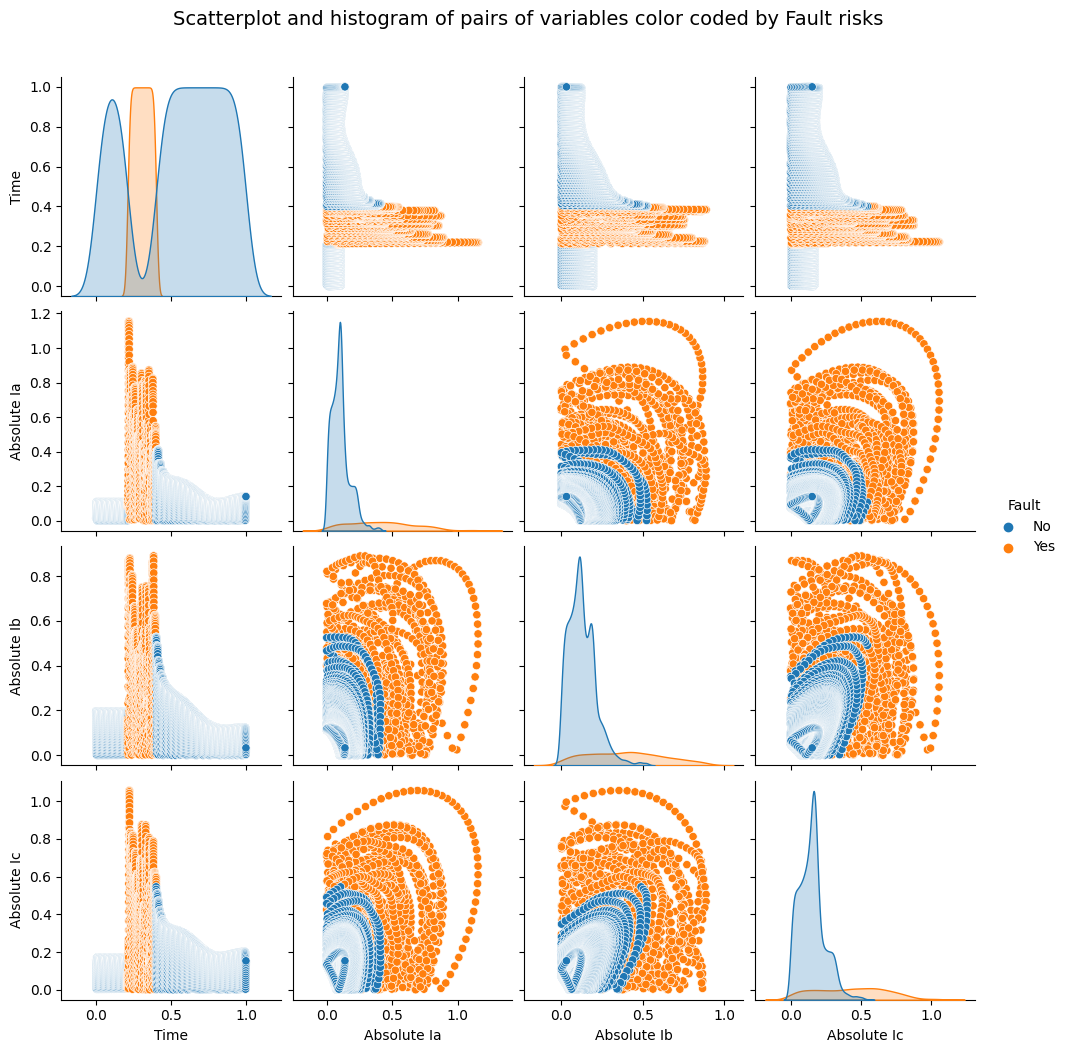

In [6]:
g = sns.pairplot(dataset, hue='Fault')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by Fault risks",
               fontsize = 14,
               y=1.05);

In [7]:
dataset['Fault'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
dataset['Fault'] = dataset['Fault'].replace('No', 0).replace('Yes', 1)

In [9]:
y = dataset['Fault']
X = dataset.drop(['Fault'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

**1. Introduction to Decision Tree algorithm**

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

**2. Classification and Regression Trees (CART)**

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for **Classification and Regression Tree**s. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.


**3. Decision Tree algorithm terminology**





1.   In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.
2.   We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

**Root Node**

1. It represents the entire population or sample. This further gets divided into two or more homogeneous sets.

**Splitting**

1. It is a process of dividing a node into two or more sub-nodes.

**Decision Node**

1. When a sub-node splits into further sub-nodes, then it is called a decision node.

**Leaf/Terminal Node**

1. Nodes that do not split are called Leaf or Terminal nodes.

**Pruning**

1. When we remove sub-nodes of a decision node, this process is called pruning.
it is opposite process of splitting.

**Branch/Sub-Tree**

1. A sub-section of an entire tree is called a branch or sub-tree.

**Parent and Child Node**

1. A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

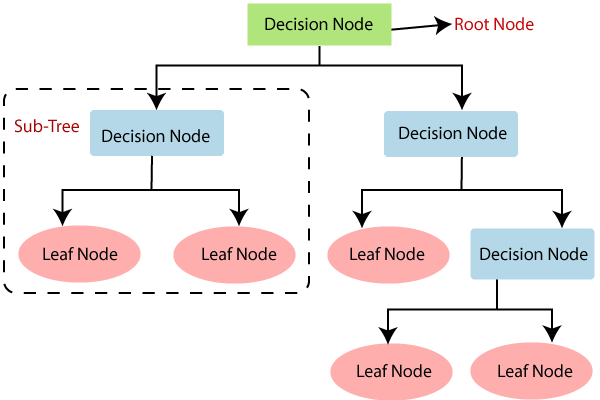

**Decision Tree algorithm intuition**
The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-

1. For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

2. For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3. This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

**Attribute selection measures**
The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

**Information gain**

**Gini index**

While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.

**Entropy**
Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-


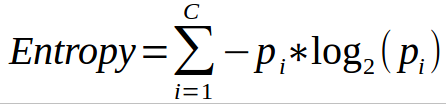

Here, c is the number of classes and pi is the probability associated with the ith class.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

**Gini index**

Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index.** It uses the Gini method to create split points.

Gini index can be represented with the following diagram:-

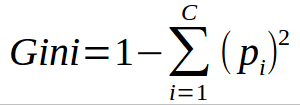

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1. Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2. Calculate Gini for split using weighted Gini score of each node of that split.

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.



In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=SEED)

In [12]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


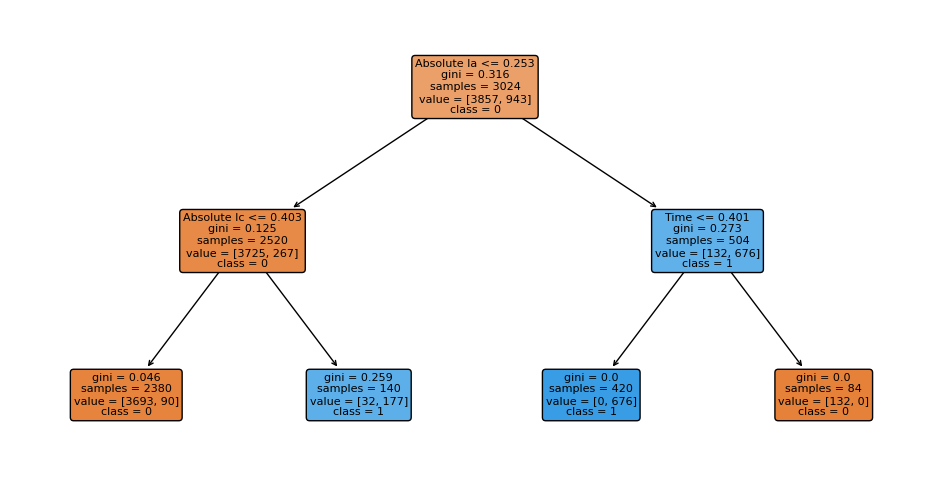

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


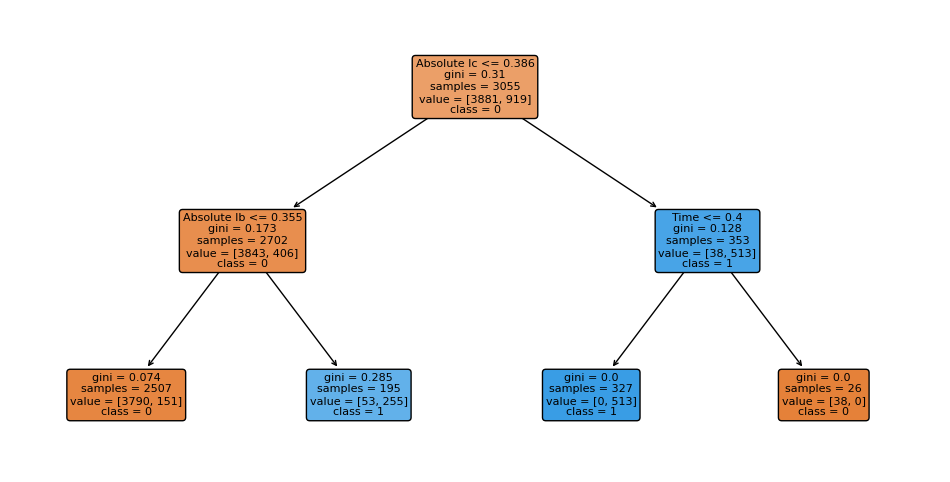

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


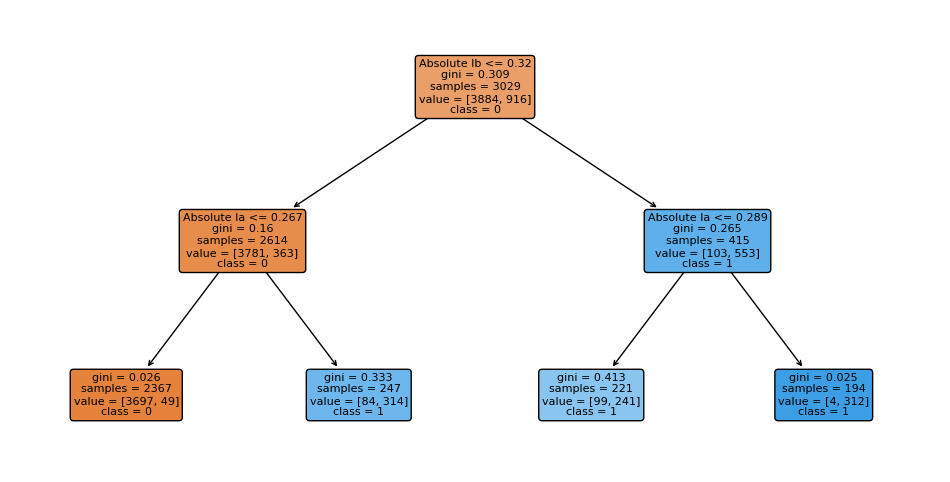

In [13]:
# Import `tree` module
from sklearn import tree

features = X.columns.values
classes = ['0', '1']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       969
           1       0.95      0.97      0.96       231

    accuracy                           0.98      1200
   macro avg       0.97      0.98      0.97      1200
weighted avg       0.98      0.98      0.98      1200



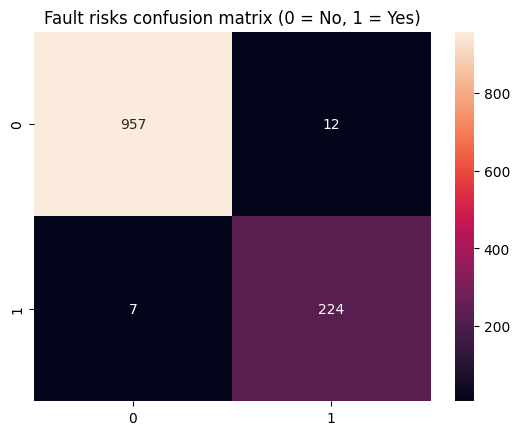

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Fault risks confusion matrix (0 = No, 1 = Yes)')

print(classification_report(y_test,y_pred))

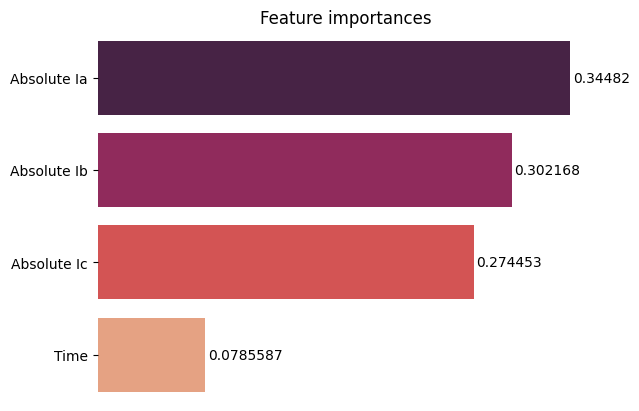

In [15]:
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })


features_df_sorted = features_df.sort_values(by='importances', ascending=False)


g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv("/content/ABCG Modified.csv")

In [18]:
dataset['Fault'] = dataset['Fault'].replace('No', 0).replace('Yes', 1)

In [19]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20,
                            max_depth=3,
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

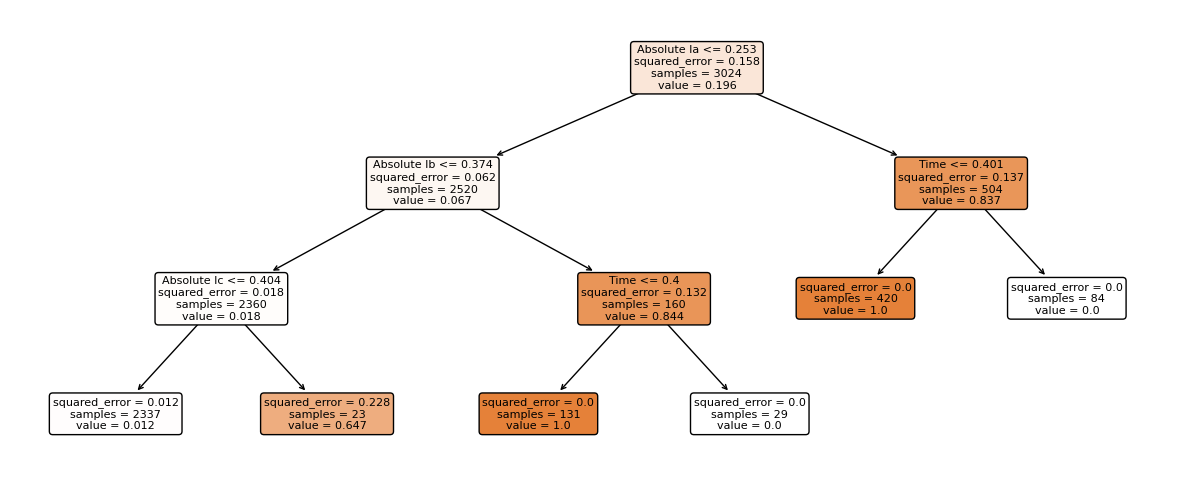

In [21]:
from sklearn import tree

features = X.columns

first_tree = rfr.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8,
               filled=True,
               rounded=True);

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


Mean Absolute Error: 0.01975730373853218
Mean Squared Error: 0.007684333789449926
